References:
- Coursera: [Introduction to TensorFlow for Artificial Intelligence, Machine Learning, and Deep Learning](https://www.coursera.org/)

Python packages:
- tensorflow 1.12
- tensorflow-base 1.12
- pydot
- opencv3 - _conda install --channel https://conda.anaconda.org/menpo opencv3_

### Single Nueron Network - House Price Prediction

_Imagine if house pricing was as easy as a house costs 50k + 50k per bedroom, so that a 1 bedroom house costs 100k, a 2 bedroom house costs 150k etc._

_How would you create a neural network that learns this relationship so that it would predict a 7 bedroom house as costing close to 400k etc._

_**Hint**: Your network might work better if you scale the house price down. You don't have to give the answer 400...it might be better to create something that predicts the number 4, and then your answer is in the 'hundreds of thousands' etc._

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
xs = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
ys = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5], dtype=float)
model.fit(xs, ys, epochs=10)
print(model.predict([7.0]))

Epoch 1/10
6/6 [==============================] - 0s 49ms/step - loss: 4.4166
Epoch 2/10
6/6 [==============================] - 0s 304us/step - loss: 2.0831
Epoch 3/10
6/6 [==============================] - 0s 454us/step - loss: 1.0029
Epoch 4/10
6/6 [==============================] - 0s 357us/step - loss: 0.5026
Epoch 5/10
6/6 [==============================] - 0s 300us/step - loss: 0.2708
Epoch 6/10
6/6 [==============================] - 0s 262us/step - loss: 0.1632
Epoch 7/10
6/6 [==============================] - 0s 323us/step - loss: 0.1132
Epoch 8/10
6/6 [==============================] - 0s 265us/step - loss: 0.0897
Epoch 9/10
6/6 [==============================] - 0s 333us/step - loss: 0.0786
Epoch 10/10
6/6 [==============================] - 0s 265us/step - loss: 0.0732
[[4.4566965]]


_**Questions**:_
- _Why do we use mean square error as loss function?_
- _Could we use other type of loss function?_

[How to Visualize a Deep Learning Neural Network Model in Keras](https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/)

### Artifical Neural Networks - FashionMNIST

In [11]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

4423680/4422102 [==============================] - 1s 0us/step
Epoch 1/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.4750 - acc: 0.8306
Epoch 2/10
60000/60000 [==============================] - 19s 324us/step - loss: 0.3591 - acc: 0.8682
Epoch 3/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.3212 - acc: 0.8827
Epoch 4/10
60000/60000 [==============================] - 21s 351us/step - loss: 0.2973 - acc: 0.8901
Epoch 5/10
60000/60000 [==============================] - 22s 359us/step - loss: 0.2803 - acc: 0.8964
Epoch 6/10
60000/60000 [==============================] - 21s 350us/step - loss: 0.2648 - acc: 0.9012
Epoch 7/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.2515 - acc: 0.9060
Epoch 8/10
60000/60000 [==============================] - 21s 357us/step - loss: 0.2392 - acc: 0.9100
Epoch 9/10
60000/60000 [==============================] - 21s 343us/step - loss: 0.2318 - acc: 0.9125
Epoch 10/10
60000/6

_**Questions**: Why the number of parameter is 40192 but not 784x512=401408?_

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [4]:
from keras.utils import plot_model
# plot_model(model, to_file='/Users/neikusc/src/hackathon19/model_hand_writing.png')
plot_model(model, to_file='model_hand_writing.png', show_shapes=True, show_layer_names=True)

In [4]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train[0].shape

(28, 28)

9
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.
    0.  13.  73.   0.   0.   1.   4.   0.   0.   0.   0.   1.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.   0.
   36. 136. 127.  62.  54.   0.   0.   0.   1.   3.   4.   0.   0.   3.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   6.   0.
  102. 204. 176. 134. 144. 123.  23.   0.   0.   0.   0.  12.  10.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  155. 236. 207. 178. 107. 156. 161. 109.  64.  23.  77.

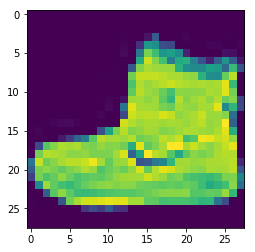

In [15]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(y_train[0])
print(x_train[0])